In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

In [2]:
df=pd.read_csv('IPLData.csv')

In [3]:
df.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Player_Type'].unique()

array(['Batter', 'Bowler ', 'Keeper', 'Allrounder'], dtype=object)

In [5]:
df.describe().sum()

Capped                  240.900099
Matches_Played          621.092977
Runs                   9868.917589
Average                 318.466547
Strike_Rate             883.804128
Wickets                 441.358134
Bowling_average         427.223626
Economy                 195.291723
Bowling_Strike_Rate     331.103184
Catches                 292.507785
Run_outs                 61.454690
Stumps                   91.188209
dtype: float64

In [6]:
df.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

as their are different kind of players who have different roles to play it is expected to lots of null values.
we have to figure out where null values should remove

#DATA CLEANING

Trying to find top batters and all rounders

as we will work with the players who are active :
Here uncapeed players data are outliers so we have to remove it.
    
1. capped players catagories-
a.batters,
b.bowlers,
c.all-rounder,
d.wicket keeper
2. uncapped will be cleaned


In [7]:
batters=df.loc[(df['Player_Type']=='Batter')]
batters_new=batters.loc[(batters['Capped']==1)]
batters_new.columns
#uncapped data(outliers are removed)

Index(['Player Name', 'Team', 'Nationality', 'Player_Type', 'Capped',
       'Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate', 'Catches',
       'Run_outs', 'Stumps'],
      dtype='object')

Needed column for batters

In [8]:
capped_batters=batters_new[['Player Name', 'Team', 'Nationality','Matches_Played', 'Runs', 'Average','Strike_Rate']]

In [9]:
capped_batters.isna().sum()

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64

No null Values for batters needed column because we drop all the nun column which are not needed.

In [10]:

bowlers=df.loc[(df['Player_Type']=='Bowler ')]

bowlers_new=bowlers.loc[(bowlers['Capped']==1)]
#bowlers.info()
#uncapped data(outliers are removed)

In [11]:
capped_bowlers=bowlers_new[['Player Name', 'Team', 'Nationality','Matches_Played','Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate']]

In [12]:
capped_bowlers.isnull().sum()

Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        3
Economy                0
Bowling_Strike_Rate    6
dtype: int64

In [13]:
capped_bowlers[capped_bowlers['Bowling_average'].isnull()]

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
83,Rasikh Dar,Kolkata,Indian,1.0,1.0,NaN,10.5,NaN
87,Sean Abbott,Hyderabad,Overseas,2.0,0.0,NaN,11.4,NaN
101,Kuldip Yadav,Rajasthan,Indian,1.0,0.0,NaN,8.0,NaN


as the player only played less than 3 macth we can drop the column with null Bowling average values.

In [14]:
capped_bowlers = capped_bowlers.dropna(subset=['Bowling_average'])
capped_bowlers.isnull().sum()

Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    3
dtype: int64

In [15]:
capped_bowlers[capped_bowlers['Bowling_Strike_Rate'].isnull()]

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
56,Ishan Porel,Punjab,Indian,1.0,1.0,39.0,9.74,NaN
77,Jason Behrendoff,Bangalore,Overseas,5.0,5.0,33.0,8.68,NaN
94,Karn Sharma,Bangalore,Indian,19.0,12.0,41.2,8.27,NaN


As Bowling_Strike_Rate is not easy to find from given values we search in google to find the strike rate of karn sharma as he played more than 10 match and it is 29.5

In [16]:
capped_bowlers.drop([56,77],inplace=True)


In [17]:
#working with null values
capped_bowlers.fillna(value=29.5)

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44
41,Prasidh Krishna,Rajasthan,Indian,34.0,30.0,38.40,9.27,24.87
42,Lockei Ferguson,Gujarat,Overseas,22.0,24.0,27.00,8.12,19.96
43,Josh Hazlewood,Bangalore,Overseas,12.0,12.0,29.75,7.93,22.50
45,Bhuvneshwar Kumar,Hyderabad,Indian,132.0,142.0,25.27,7.30,20.77
46,Shardul Thakur,Delhi,Indian,61.0,67.0,27.87,8.89,18.81


In [18]:
keepers=df.loc[(df['Player_Type']=='Keeper')]

keepers_new=keepers.loc[(keepers['Capped']==1)]
capped_keepers=keepers_new[['Player Name', 'Team', 'Nationality','Matches_Played', 'Runs', 'Average', 'Strike_Rate','Catches',
       'Run_outs', 'Stumps']]
capped_keepers.head(5)

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [19]:
print(capped_keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           1
Run_outs          1
Stumps            1
dtype: int64


In [20]:
capped_keepers.fillna(0,inplace=True)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_67981/3835240442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capped_keepers.fillna(0,inplace=True)


In [21]:
all_r=df.loc[(df['Player_Type']=='Allrounder')]

allr_new=all_r.loc[(all_r['Capped']==1)]
capped_allr=allr_new[['Player Name','Matches_Played', 'Runs', 'Average', 'Strike_Rate', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate',]]
capped_allr.head

<bound method NDFrame.head of               Player Name  Matches_Played    Runs  Average  Strike_Rate  \
127  Ravichandran Ashwin            167.0   456.0   11.120       109.88   
128          Pat Cummins             37.0   316.0   19.750       140.44   
129         Dwayne Bravo            151.0  1537.0   22.940       130.25   
130          Nitish Rana             77.0  1820.0   28.000       132.46   
131          Jason Holder            26.0   189.0   14.540       121.15   
132         Harshal Patel            63.0   187.0   11.000       134.53   
133          Deepak Hooda            80.0   785.0   16.700       129.54   
135     Washington Sundar            42.0   217.0   14.470       111.28   
136         Krunal Pandya            84.0  1143.0   22.410       138.55   
137        Mitchell Marsh            21.0   225.0   17.310       114.21   
138           Riyan Parag            30.0   339.0   16.950       118.53   
139      Abhishek Sharma             22.0   241.0   17.210       139.3

In [22]:

capped_allr.isna().sum()

Player Name            0
Matches_Played         0
Runs                   1
Average                2
Strike_Rate            1
Wickets                4
Bowling_average        4
Economy                3
Bowling_Strike_Rate    4
dtype: int64

In [23]:
capped_allr.dropna(subset=['Runs','Wickets'],inplace=True)


/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_67981/1551155141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capped_allr.dropna(subset=['Runs','Wickets'],inplace=True)


In [24]:
capped_allr.isna().sum()

Player Name            0
Matches_Played         0
Runs                   0
Average                1
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64

as we are working with all rounder if where we do not have both the values of batting and bowling we drop all 

In [25]:
average_of_batting=capped_allr[capped_allr['Average'].isnull()]
average_of_batting['Runs']/average_of_batting['Matches_Played']

145    8.4
dtype: float64

In [26]:
capped_allr.fillna(value=8.4,inplace=True)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_67981/4269938408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capped_allr.fillna(value=8.4,inplace=True)


fill the batting average with the players average run.

In [27]:
print(capped_batters.isna().sum())
print(capped_bowlers.isna().sum())
print(capped_keepers.isna().sum())
print(capped_allr.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    1
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64
Player Name            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64


In [28]:
capped_batters

top_batters=capped_batters.loc[(capped_batters['Average']>=32)]
top_batters_avg=top_batters.sort_values("Average",ascending=False)
top_batters_strike=top_batters.sort_values("Strike_Rate",ascending=False)
top_batters_run=top_batters.sort_values("Runs",ascending=False)
top_batters_matches=top_batters.sort_values("Matches_Played",ascending=False)

In [29]:
top_batters_avg

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [30]:
top_batters_run

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [31]:
top_batters_strike

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [32]:
top_batters_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [33]:
capped_bowlers.columns

Index(['Player Name', 'Team', 'Nationality', 'Matches_Played', 'Wickets',
       'Bowling_average', 'Economy', 'Bowling_Strike_Rate'],
      dtype='object')

In [34]:
top_bowlers=capped_bowlers.loc[(capped_bowlers['Bowling_average']<=24)]
top_bowlers

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12


In [35]:
top_bowlers=capped_bowlers.loc[((capped_bowlers['Bowling_average']<=25) & (capped_bowlers['Matches_Played']>=10))]
top_bowlers_avg=top_bowlers.sort_values("Bowling_average")
top_bowlers_eco=top_bowlers.sort_values("Economy")
top_bowlers_bsr=top_bowlers.sort_values("Bowling_Strike_Rate")
top_bowlers_matches=top_bowlers.sort_values("Matches_Played",ascending=False)

In [36]:
top_bowlers_avg

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
65,Khaleel Ahmed,Delhi,Indian,24.0,32.0,24.56,8.69,16.97


In [37]:
top_bowlers_eco

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
65,Khaleel Ahmed,Delhi,Indian,24.0,32.0,24.56,8.69,16.97
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23


In [38]:
top_bowlers_matches

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50
65,Khaleel Ahmed,Delhi,Indian,24.0,32.0,24.56,8.69,16.97
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96


In [39]:
capped_allr.columns

Index(['Player Name', 'Matches_Played', 'Runs', 'Average', 'Strike_Rate',
       'Wickets', 'Bowling_average', 'Economy', 'Bowling_Strike_Rate'],
      dtype='object')

In [40]:
top_allr=capped_allr.loc[((capped_allr['Strike_Rate']>=135.0) & (capped_allr['Matches_Played']>=10))]

In [41]:
top_allr

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
128,Pat Cummins,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95
136,Krunal Pandya,84.0,1143.0,22.410,138.55,51.0,34.76,7.37,28.31
139,Abhishek Sharma,22.0,241.0,17.210,139.31,7.0,25.14,8.00,18.86
154,K Gowtham,24.0,186.0,14.310,169.09,13.0,43.23,8.26,31.38
165,Jofra Archer,35.0,195.0,15.000,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,17.0,180.0,15.000,151.26,13.0,31.38,7.14,26.38
204,Andre Russell,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
221,Rashid Khan,76.0,222.0,9.255,137.04,93.0,20.56,6.33,19.48


In [42]:
top_allr_average=top_allr.sort_values('Average',ascending=False)
top_allr_sr=top_allr.sort_values('Strike_Rate',ascending=False)
top_allr_runs=top_allr.sort_values('Runs',ascending=False)
top_allr_wic=top_allr.sort_values('Wickets',ascending=False)
top_allr_bavg=top_allr.sort_values('Bowling_average')
top_allr_bsr=top_allr.sort_values('Bowling_Strike_Rate')
top_allr_bsr=top_allr.sort_values('Bowling_Strike_Rate')
top_allr_eco=top_allr.sort_values('Economy')
top_allr_match=top_allr.sort_values('Matches_Played',ascending=False)


In [43]:
top_allr_match.head(10)

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,178.0,3268.0,29.980,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,134.0,954.0,15.640,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
136,Krunal Pandya,84.0,1143.0,22.410,138.55,51.0,34.76,7.37,28.31
204,Andre Russell,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
221,Rashid Khan,76.0,222.0,9.255,137.04,93.0,20.56,6.33,19.48
222,Marcus Stoinis,56.0,914.0,27.700,135.81,30.0,32.30,9.50,20.40
128,Pat Cummins,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,35.0,195.0,15.000,157.26,46.0,21.33,7.13,17.93


In [44]:
top_allr_average.head()

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
222,Marcus Stoinis,56.0,914.0,27.70,135.81,30.0,32.30,9.50,20.40
211,Hardik Pandya,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [45]:
top_allr_sr

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,24.0,186.0,14.310,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,134.0,954.0,15.640,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,35.0,195.0,15.000,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,17.0,180.0,15.000,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,178.0,3268.0,29.980,149.77,65.0,31.62,8.78,21.60
223,Moeen Ali,34.0,666.0,22.970,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95


In [46]:
top_allr_runs

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,178.0,3268.0,29.980,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
136,Krunal Pandya,84.0,1143.0,22.410,138.55,51.0,34.76,7.37,28.31
232,Sunil Narine,134.0,954.0,15.640,161.69,143.0,24.53,6.74,21.83
222,Marcus Stoinis,56.0,914.0,27.700,135.81,30.0,32.30,9.50,20.40
223,Moeen Ali,34.0,666.0,22.970,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95
139,Abhishek Sharma,22.0,241.0,17.210,139.31,7.0,25.14,8.00,18.86


<AxesSubplot:xlabel='Player Name', ylabel='Strike_Rate'>

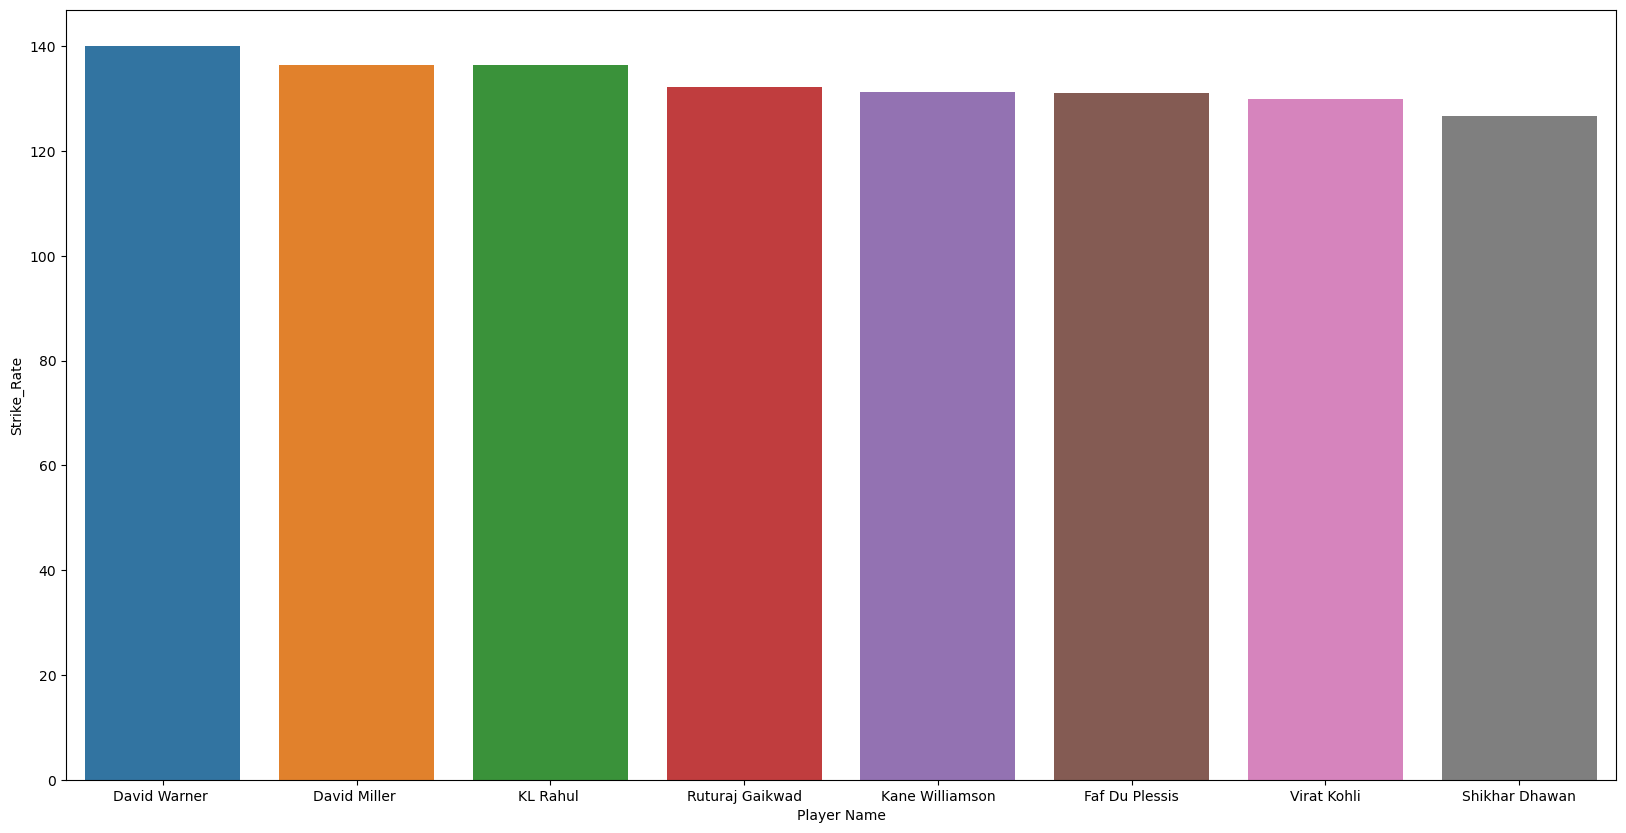

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batters_strike)

<AxesSubplot:xlabel='Player Name', ylabel='Runs'>

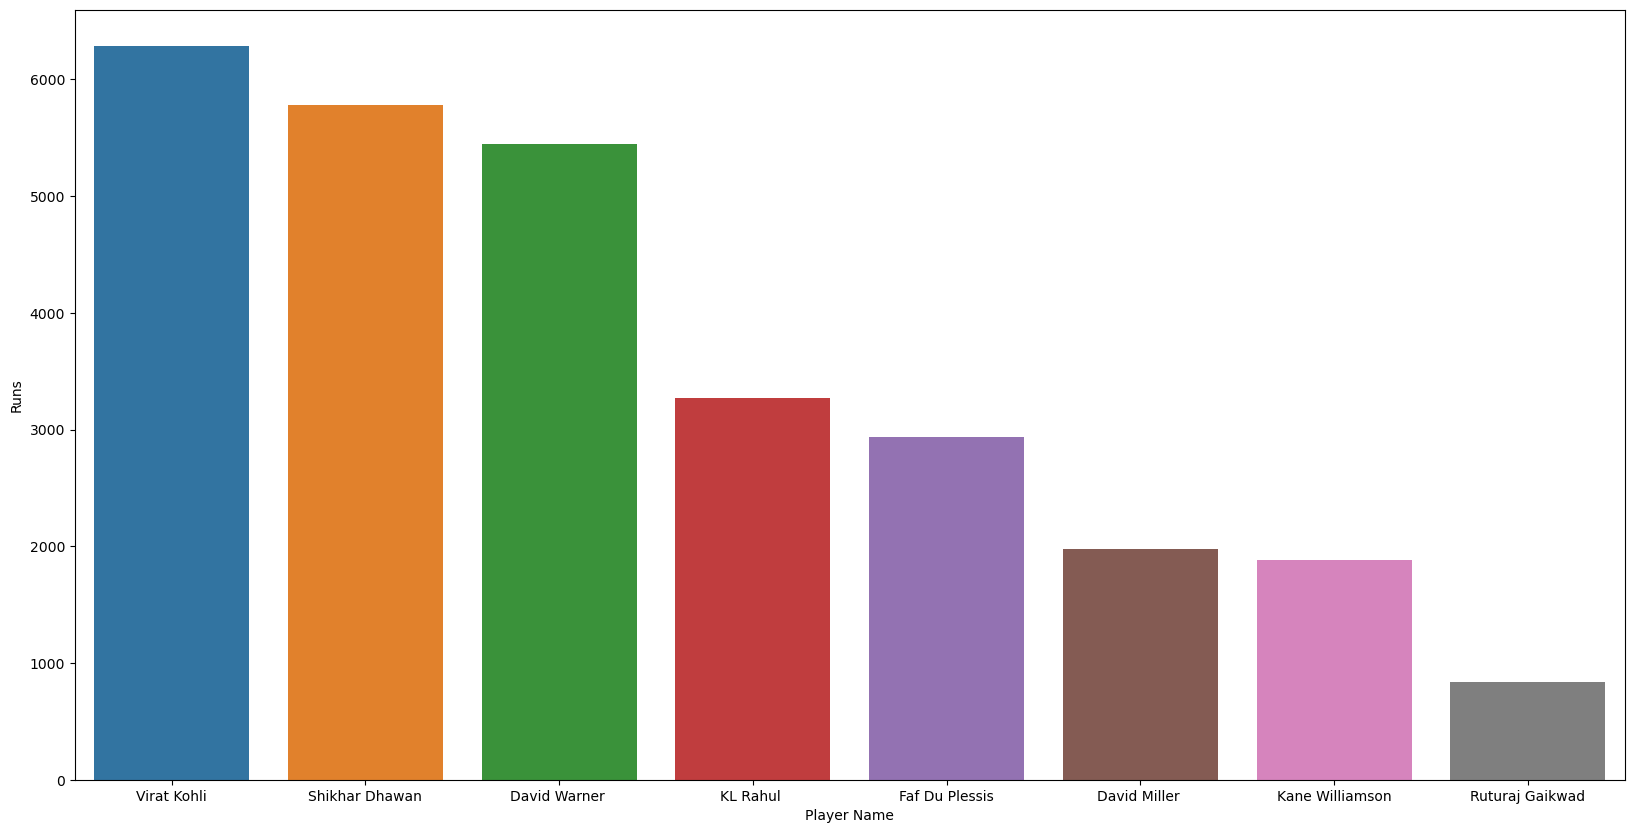

In [48]:
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_batters_run)

In [49]:
top_batters.reset_index(drop=True)

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
2,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
3,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
4,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
5,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
6,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
7,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [50]:
match_values=[top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
run_values=[top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
sr_values=[top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
avg_values=[top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
labels=['rahul','warner','kohli']

Text(0.5, 1.0, 'strike rate')

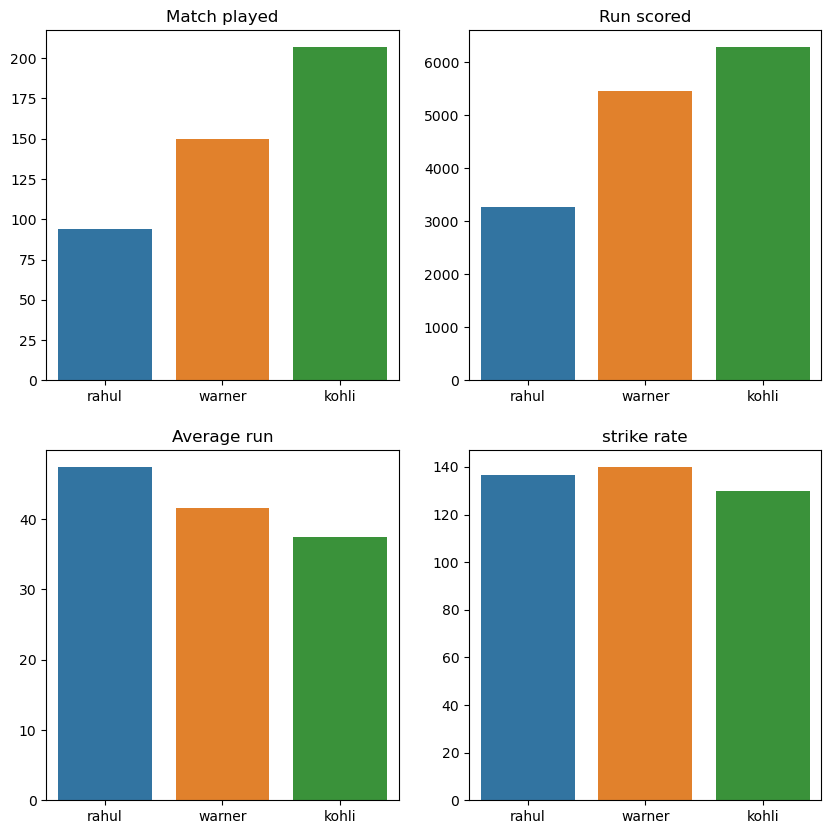

In [51]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

sns.barplot(x=labels,y=match_values,ax=axes[0][0]).set_title("Match played")
sns.barplot(x=labels,y=run_values,ax=axes[0][1]).set_title("Run scored")
sns.barplot(x=labels,y=avg_values,ax=axes[1][0]).set_title("Average run")
sns.barplot(x=labels,y=sr_values,ax=axes[1][1]).set_title("strike rate")


In [52]:
p=top_batters.loc[top_batters['Nationality']=='Indian']
type(p)
p.columns
p.shape

(4, 7)

In [53]:
top_batters

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [54]:
top_allr

,Player Name,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
128,Pat Cummins,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95
136,Krunal Pandya,84.0,1143.0,22.410,138.55,51.0,34.76,7.37,28.31
139,Abhishek Sharma,22.0,241.0,17.210,139.31,7.0,25.14,8.00,18.86
154,K Gowtham,24.0,186.0,14.310,169.09,13.0,43.23,8.26,31.38
165,Jofra Archer,35.0,195.0,15.000,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,17.0,180.0,15.000,151.26,13.0,31.38,7.14,26.38
204,Andre Russell,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
221,Rashid Khan,76.0,222.0,9.255,137.04,93.0,20.56,6.33,19.48


<AxesSubplot:xlabel='Matches_Played'>

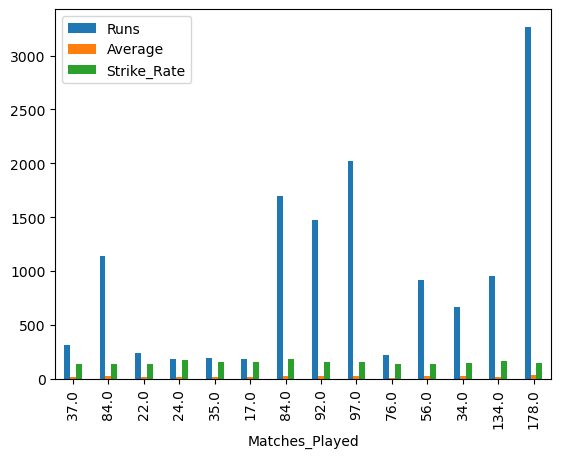

In [55]:
top_allr.plot(x='Matches_Played',y=['Runs','Average','Strike_Rate'],kind='bar')

a list of top batter and top all rounder are.